In [205]:
#Imports
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from multiprocessing import Pool
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

In [411]:
costs = np.load('../../Datasets/costs_parallelized.npz')
costs = costs['costs']
np.fill_diagonal(costs,0)

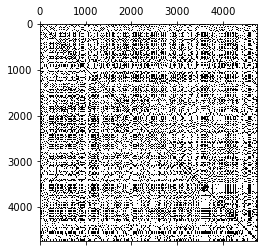

In [354]:
plt.spy(costs)
plt.show()

In [488]:
cosine = np.load('../../Datasets/cosine_compressed.npz')
cosine = cosine['cosine']

np.fill_diagonal(cosine,0)

to_remove_index = Movies.loc[Movies['vote_average'] == 0].index
cosine = np.delete(cosine, to_remove_index,0)
cosine = np.delete(cosine, to_remove_index,1)

In [470]:
distances = costs + cosine
np.fill_diagonal(distances,0)

In [413]:
distances.sum(axis=0)

array([ 4067.91911329,  9930.45525386,  2970.09823267, ...,  5047.68044981,
        4156.11144705,  5253.0632567 ])

In [359]:
treshold = 0.2
distances[distances<treshold] = 0


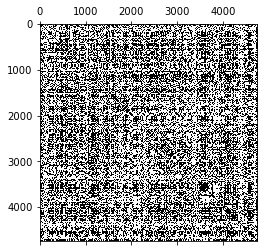

In [429]:
plt.spy(distances)
plt.show()

In [430]:
kernel_width = costs.mean()
s = kernel_width
weights = scipy.exp(-np.power(distances,2) / s ** 2)

#To avoid self-connections.
np.fill_diagonal(weights, 0)

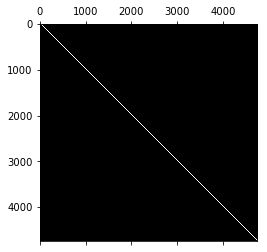

In [431]:
plt.spy(weights)
plt.show()

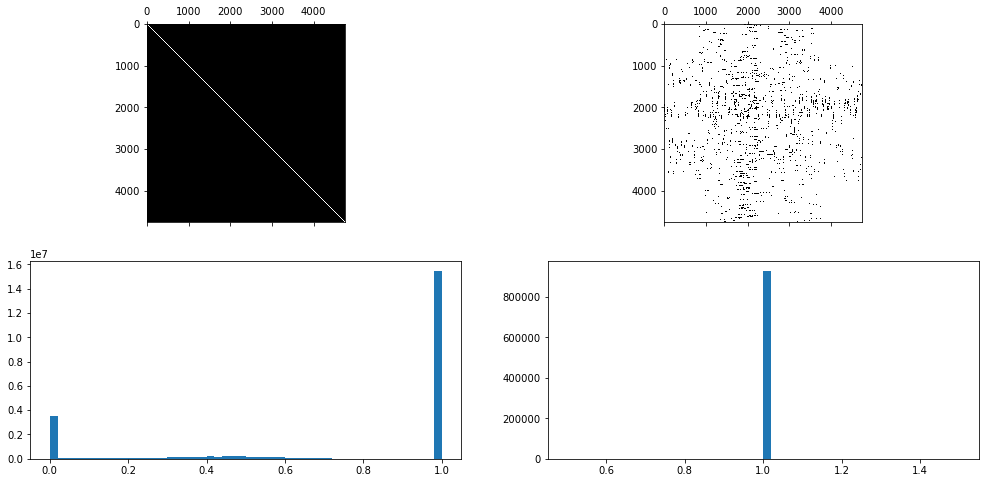

In [432]:
fix, axes = plt.subplots(2, 2, figsize=(17, 8))
def plot(weights, axes):
    axes[0].spy(weights)
    axes[1].hist(weights[weights > 0].reshape(-1), bins=50);
plot(weights, axes[:, 0])

NEIGHBORS = 100
indices = weights.argsort()[:,-NEIGHBORS:]
tmp = np.zeros(weights.shape)
for i in range(0,len(weights)):
    indice = indices[i]
    for j in range(0,NEIGHBORS):
        tmp[i,indice[j]] = weights[i,indice[j]]
        tmp[indice[j],i] = weights[i,indice[j]]
reduced_weights = tmp
plot(reduced_weights, axes[:, 1])


plt.show()

In [500]:
for i in range(Movies.shape[0]):
    best_movie = np.argmax(costs[i])
    
    print('Original film: {} || Predicted movie: {}'.format(Movies.iloc[i]['title'],Movies.iloc[best_movie]['title']))

Original film: #Horror || Predicted movie: The Shawshank Redemption
Original film: (500) Days of Summer || Predicted movie: Seven Psychopaths
Original film: 10 Cloverfield Lane || Predicted movie: Pulp Fiction
Original film: 10 Days in a Madhouse || Predicted movie: The Departed
Original film: 10 Things I Hate About You || Predicted movie: Dancer, Texas Pop. 81
Original film: 102 Dalmatians || Predicted movie: Dancer, Texas Pop. 81
Original film: 10th & Wolf || Predicted movie: Batman Begins
Original film: 11:14 || Predicted movie: The Secret in Their Eyes
Original film: 12 Angry Men || Predicted movie: Dead Man Walking
Original film: 12 Rounds || Predicted movie: Dark Blue
Original film: 12 Years a Slave || Predicted movie: Django Unchained
Original film: 127 Hours || Predicted movie: The Great Escape
Original film: 13 Going on 30 || Predicted movie: Dancer, Texas Pop. 81
Original film: 13 Hours: The Secret Soldiers of Benghazi || Predicted movie: We Were Soldiers
Original film: 1408 

Original film: Area 51 || Predicted movie: [REC]
Original film: Argo || Predicted movie: The Pianist
Original film: Arlington Road || Predicted movie: Sea of Love
Original film: Armageddon || Predicted movie: Guardians of the Galaxy
Original film: Armored || Predicted movie: Inception
Original film: Army of Darkness || Predicted movie: Howl's Moving Castle
Original film: Arn: The Knight Templar || Predicted movie: Seven Samurai
Original film: Around the World in 80 Days || Predicted movie: From Russia with Love
Original film: Aroused || Predicted movie: The Square
Original film: Arthur Christmas || Predicted movie: It's a Wonderful Life
Original film: Arthur and the Invisibles || Predicted movie: Raiders of the Lost Ark
Original film: As Above, So Below || Predicted movie: Interview with the Vampire
Original film: As Good as It Gets || Predicted movie: Dancer, Texas Pop. 81
Original film: As It Is in Heaven || Predicted movie: Me You and Five Bucks
Original film: Ask Me Anything || Pre

Original film: Brighton Rock || Predicted movie: This Is England
Original film: Bring It On || Predicted movie: DodgeBall: A True Underdog Story
Original film: Bringing Down the House || Predicted movie: Dancer, Texas Pop. 81
Original film: Bringing Out the Dead || Predicted movie: Trainspotting
Original film: Brokeback Mountain || Predicted movie: Amores perros
Original film: Brokedown Palace || Predicted movie: The Shawshank Redemption
Original film: Broken Arrow || Predicted movie: Die Hard
Original film: Broken City || Predicted movie: Gattaca
Original film: Broken Horses || Predicted movie: Pulp Fiction
Original film: Broken Vessels || Predicted movie: The Shawshank Redemption
Original film: Bronson || Predicted movie: The Shawshank Redemption
Original film: Brooklyn || Predicted movie: GoodFellas
Original film: Brooklyn Rules || Predicted movie: The Shawshank Redemption
Original film: Brooklyn's Finest || Predicted movie: Monster
Original film: Brother || Predicted movie: Se7en
O

Original film: Delivery Man || Predicted movie: Dancer, Texas Pop. 81
Original film: Demonic || Predicted movie: Gattaca
Original film: Departure || Predicted movie: Philadelphia
Original film: Derailed || Predicted movie: GoodFellas
Original film: Desert Blue || Predicted movie: Little Big Top
Original film: Desert Dancer || Predicted movie: Schindler's List
Original film: Desire || Predicted movie: Dogtooth
Original film: Desperado || Predicted movie: Pulp Fiction
Original film: Despicable Me || Predicted movie: Despicable Me 2
Original film: Despicable Me 2 || Predicted movie: Despicable Me
Original film: Detention || Predicted movie: Halloween
Original film: Detention of the Dead || Predicted movie: Little Big Top
Original film: Deterrence || Predicted movie: Seven Samurai
Original film: Detroit Rock City || Predicted movie: Little Big Top
Original film: Deuce Bigalow: European Gigolo || Predicted movie: Dancer, Texas Pop. 81
Original film: Deuce Bigalow: Male Gigolo || Predicted m

Original film: Forgetting Sarah Marshall || Predicted movie: Dancer, Texas Pop. 81
Original film: Forrest Gump || Predicted movie: Dancer, Texas Pop. 81
Original film: Forsaken || Predicted movie: One Man's Hero
Original film: Fort McCoy || Predicted movie: The Boy in the Striped Pyjamas
Original film: Fortress || Predicted movie: Terminator 2: Judgment Day
Original film: Forty Shades of Blue || Predicted movie: Ordet
Original film: Four Brothers || Predicted movie: Kill Bill: Vol. 2
Original film: Four Christmases || Predicted movie: The Holiday
Original film: Four Lions || Predicted movie: Dancer, Texas Pop. 81
Original film: Four Rooms || Predicted movie: Baby Boy
Original film: Four Weddings and a Funeral || Predicted movie: 27 Dresses
Original film: Frailty || Predicted movie: The Devil's Rejects
Original film: Frances Ha || Predicted movie: Dancer, Texas Pop. 81
Original film: Frankenweenie || Predicted movie: My Dog Tulip
Original film: Frat Party || Predicted movie: Dancer, Tex

Original film: House of Sand and Fog || Predicted movie: A Separation
Original film: House of Wax || Predicted movie: The Thing
Original film: House on Haunted Hill || Predicted movie: The Shining
Original film: Housebound || Predicted movie: The Others
Original film: Housefull || Predicted movie: The Shawshank Redemption
Original film: How Do You Know || Predicted movie: Dancer, Texas Pop. 81
Original film: How Green Was My Valley || Predicted movie: Prisoners
Original film: How High || Predicted movie: Dancer, Texas Pop. 81
Original film: How She Move || Predicted movie: The Color Purple
Original film: How Stella Got Her Groove Back || Predicted movie: Dancer, Texas Pop. 81
Original film: How the Grinch Stole Christmas || Predicted movie: Jingle All the Way
Original film: How to Be Single || Predicted movie: Dancer, Texas Pop. 81
Original film: How to Deal || Predicted movie: City of God
Original film: How to Fall in Love || Predicted movie: Dancer, Texas Pop. 81
Original film: How t

Original film: Letters to Juliet || Predicted movie: Stiff Upper Lips
Original film: Liar Liar || Predicted movie: Dancer, Texas Pop. 81
Original film: Licence to Kill || Predicted movie: Goldfinger
Original film: License to Wed || Predicted movie: Dancer, Texas Pop. 81
Original film: Lies in Plain Sight || Predicted movie: City of God
Original film: Life During Wartime || Predicted movie: Little Big Top
Original film: Life as a House || Predicted movie: The Hunt
Original film: Life of Pi || Predicted movie: Pirates of the Caribbean: At World's End
Original film: Life or Something Like It || Predicted movie: Dancer, Texas Pop. 81
Original film: Lifeforce || Predicted movie: Spirited Away
Original film: Light It Up || Predicted movie: The Shawshank Redemption
Original film: Light Sleeper || Predicted movie: The Lives of Others
Original film: Lights Out || Predicted movie: The Conjuring
Original film: Like Crazy || Predicted movie: The Shawshank Redemption
Original film: Like Mike || Pre

Original film: My Stepmother is an Alien || Predicted movie: Dancer, Texas Pop. 81
Original film: My Summer of Love || Predicted movie: Circumstance
Original film: My Super Ex-Girlfriend || Predicted movie: Howl's Moving Castle
Original film: My Week with Marilyn || Predicted movie: GoodFellas
Original film: Mystery Men || Predicted movie: Captain America: Civil War
Original film: Mystery, Alaska || Predicted movie: Miracle
Original film: Mystic Pizza || Predicted movie: Little Big Top
Original film: Mystic River || Predicted movie: Mulholland Drive
Original film: N-Secure || Predicted movie: The Shawshank Redemption
Original film: Nacho Libre || Predicted movie: Dancer, Texas Pop. 81
Original film: Namastey London || Predicted movie: The Shawshank Redemption
Original film: Nancy Drew || Predicted movie: Die Hard
Original film: Nanny McPhee || Predicted movie: Spirited Away
Original film: Nanny McPhee and the Big Bang || Predicted movie: Dancer, Texas Pop. 81
Original film: Napoleon Dy

Original film: Pitch Black || Predicted movie: Gattaca
Original film: Pitch Perfect || Predicted movie: Pitch Perfect 2
Original film: Pitch Perfect 2 || Predicted movie: Pitch Perfect
Original film: Pixels || Predicted movie: Captain America: The Winter Soldier
Original film: Planet 51 || Predicted movie: Serenity
Original film: Planet of the Apes || Predicted movie: Rise of the Planet of the Apes
Original film: Plastic || Predicted movie: The Shawshank Redemption
Original film: Platoon || Predicted movie: The Thin Red Line
Original film: Play It to the Bone || Predicted movie: Dancer, Texas Pop. 81
Original film: Playing for Keeps || Predicted movie: Dancer, Texas Pop. 81
Original film: Please Give || Predicted movie: Little Big Top
Original film: Plush || Predicted movie: American Psycho
Original film: Pocahontas || Predicted movie: Dances with Wolves
Original film: Pocketful of Miracles || Predicted movie: Dancer, Texas Pop. 81
Original film: Poetic Justice || Predicted movie: Amer

Original film: Saving Mr. Banks || Predicted movie: Dancer, Texas Pop. 81
Original film: Saving Private Perez || Predicted movie: Seven Samurai
Original film: Saving Private Ryan || Predicted movie: The Pianist
Original film: Saving Silverman || Predicted movie: Dancer, Texas Pop. 81
Original film: Savva. Heart of the Warrior || Predicted movie: How to Train Your Dragon
Original film: Saw || Predicted movie: The Shining
Original film: Saw II || Predicted movie: Halloween
Original film: Saw III || Predicted movie: Halloween
Original film: Saw IV || Predicted movie: Halloween
Original film: Saw V || Predicted movie: Evil Dead II
Original film: Saw VI || Predicted movie: The Shining
Original film: Saw: The Final Chapter || Predicted movie: Evil Dead II
Original film: Say It Isn't So || Predicted movie: Dancer, Texas Pop. 81
Original film: Scarface || Predicted movie: True Romance
Original film: Scary Movie 2 || Predicted movie: Dancer, Texas Pop. 81
Original film: Scary Movie 3 || Predict

Original film: Stripes || Predicted movie: Seven Samurai
Original film: Striptease || Predicted movie: The Departed
Original film: Stuart Little || Predicted movie: Ratatouille
Original film: Stuart Little 2 || Predicted movie: Karachi se Lahore
Original film: Stuck on You || Predicted movie: Forrest Gump
Original film: Stung || Predicted movie: Dancer, Texas Pop. 81
Original film: Subconscious || Predicted movie: Das Boot
Original film: Sublime || Predicted movie: Halloween
Original film: Submarine || Predicted movie: Dead Poets Society
Original film: Subway || Predicted movie: Dredd
Original film: Sucker Punch || Predicted movie: Terminator 2: Judgment Day
Original film: Sugar Hill || Predicted movie: The Shawshank Redemption
Original film: Sugar Town || Predicted movie: Dancer, Texas Pop. 81
Original film: Suicide Squad || Predicted movie: The Dark Knight Rises
Original film: Summer Catch || Predicted movie: Good Will Hunting
Original film: Summer Storm || Predicted movie: Mambo Ita

Original film: The Blue Butterfly || Predicted movie: The Secret Life of Bees
Original film: The Blue Lagoon || Predicted movie: Me You and Five Bucks
Original film: The Blue Room || Predicted movie: GoodFellas
Original film: The Blues Brothers || Predicted movie: This Is It
Original film: The Boat That Rocked || Predicted movie: The King's Speech
Original film: The Bodyguard || Predicted movie: Mulholland Drive
Original film: The Bone Collector || Predicted movie: Shutter Island
Original film: The Book Thief || Predicted movie: Atonement
Original film: The Book of Eli || Predicted movie: Terminator 2: Judgment Day
Original film: The Book of Life || Predicted movie: Me You and Five Bucks
Original film: The Book of Mormon Movie, Volume 1: The Journey || Predicted movie: #Horror
Original film: The Boondock Saints || Predicted movie: Guardians of the Galaxy
Original film: The Boondock Saints II: All Saints Day || Predicted movie: Star Trek Into Darkness
Original film: The Borrowers || Pre

Original film: The Good, The Bad, The Weird || Predicted movie: First Blood
Original film: The Good, the Bad and the Ugly || Predicted movie: Once Upon a Time in the West
Original film: The Goods: Live Hard, Sell Hard || Predicted movie: Dancer, Texas Pop. 81
Original film: The Grace Card || Predicted movie: The Visual Bible: The Gospel of John
Original film: The Grand Budapest Hotel || Predicted movie: Dancer, Texas Pop. 81
Original film: The Grandmaster || Predicted movie: Kill Bill: Vol. 1
Original film: The Great Beauty || Predicted movie: Forrest Gump
Original film: The Great Debaters || Predicted movie: Schindler's List
Original film: The Great Escape || Predicted movie: Raiders of the Lost Ark
Original film: The Great Gatsby || Predicted movie: Notes on a Scandal
Original film: The Great Raid || Predicted movie: Das Boot
Original film: The Greatest || Predicted movie: City of God
Original film: The Greatest Game Ever Played || Predicted movie: Million Dollar Baby
Original film: 

Original film: The Musketeer || Predicted movie: Baahubali: The Beginning
Original film: The Naked Ape || Predicted movie: The Shawshank Redemption
Original film: The Naked Gun 2½: The Smell of Fear || Predicted movie: Dancer, Texas Pop. 81
Original film: The Naked Gun 33⅓: The Final Insult || Predicted movie: Dancer, Texas Pop. 81
Original film: The Names of Love || Predicted movie: American Beauty
Original film: The Namesake || Predicted movie: Morvern Callar
Original film: The Nativity Story || Predicted movie: The Visual Bible: The Gospel of John
Original film: The Negotiator || Predicted movie: Air Force One
Original film: The Neon Demon || Predicted movie: Pulp Fiction
Original film: The Net || Predicted movie: Shooting Fish
Original film: The NeverEnding Story || Predicted movie: Anne of Green Gables
Original film: The New Guy || Predicted movie: Dancer, Texas Pop. 81
Original film: The New World || Predicted movie: The Shawshank Redemption
Original film: The Newton Boys || Pred

Original film: The Smurfs || Predicted movie: Tangled
Original film: The Smurfs 2 || Predicted movie: Spirited Away
Original film: The Snow Queen || Predicted movie: WALL·E
Original film: The Social Network || Predicted movie: The Shawshank Redemption
Original film: The Soloist || Predicted movie: American History X
Original film: The Son of No One || Predicted movie: The Shawshank Redemption
Original film: The Sorcerer's Apprentice || Predicted movie: Spirited Away
Original film: The Sound of Music || Predicted movie: The Pianist
Original film: The Spanish Apartment || Predicted movie: Rang De Basanti
Original film: The Spanish Prisoner || Predicted movie: Se7en
Original film: The Specialist || Predicted movie: Kill Bill: Vol. 1
Original film: The Specials || Predicted movie: Captain America: The Winter Soldier
Original film: The Spectacular Now || Predicted movie: It's Kind of a Funny Story
Original film: The Spiderwick Chronicles || Predicted movie: Interstellar
Original film: The S

Original film: Tiny Furniture || Predicted movie: Me You and Five Bucks
Original film: Titan A.E. || Predicted movie: Monsters University
Original film: Titanic || Predicted movie: Days of Heaven
Original film: To Die For || Predicted movie: Spirited Away
Original film: To Kill a Mockingbird || Predicted movie: Sleepers
Original film: To Rome with Love || Predicted movie: Me You and Five Bucks
Original film: To Save A Life || Predicted movie: The Visual Bible: The Gospel of John
Original film: To Write Love on Her Arms || Predicted movie: Dallas Buyers Club
Original film: Tom Jones || Predicted movie: The Prisoner of Zenda
Original film: Tombstone || Predicted movie: Kill Bill: Vol. 2
Original film: Tomcats || Predicted movie: Dancer, Texas Pop. 81
Original film: Tomorrow Never Dies || Predicted movie: Dr. No
Original film: Tomorrowland || Predicted movie: Back to the Future
Original film: Tootsie || Predicted movie: Dancer, Texas Pop. 81
Original film: Top Cat Begins || Predicted movi

Original film: Warlock: The Armageddon || Predicted movie: Spirited Away
Original film: Warm Bodies || Predicted movie: Alien
Original film: Warrior || Predicted movie: Gladiator
Original film: Warriors of Virtue || Predicted movie: Spirited Away
Original film: Wasabi || Predicted movie: Do the Right Thing
Original film: Watchmen || Predicted movie: Batman Begins
Original film: Water || Predicted movie: Gandhi
Original film: Water & Power || Predicted movie: Se7en
Original film: Water for Elephants || Predicted movie: The Shawshank Redemption
Original film: Waterloo || Predicted movie: The Imitation Game
Original film: Waterworld || Predicted movie: Interstellar
Original film: Wayne's World || Predicted movie: Tupac: Resurrection
Original film: We Are Marshall || Predicted movie: Remember the Titans
Original film: We Are Your Friends || Predicted movie: The Shawshank Redemption
Original film: We Bought a Zoo || Predicted movie: The Shawshank Redemption
Original film: We Have Your Husba

In [505]:
G = nx.DiGraph()
for i in range(Movies.shape[0]):
    G.add_node(i)
    G.add_edge(i,np.argmax(costs[i]))

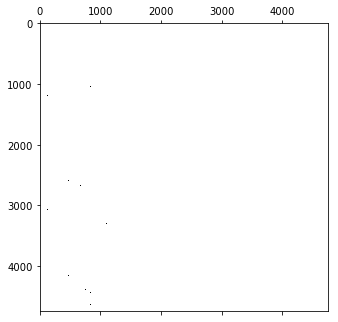

In [507]:
G_adj = nx.adjacency_matrix(G)
G_adj = G_adj.todense()
plt.spy(G_adj)
plt.show()

In [509]:
print('The clustering coefficient in G is : {}.'.format(nx.average_clustering(G)))

NetworkXError: ('Clustering algorithms are not defined ', 'for directed graphs.')